In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kagglehub

In [338]:
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")
print("Path to dataset files:", path)

all_files=os.listdir(path)
display(all_files)
path=path+'/'+all_files[0]
path

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\iammustafatz\diabetes-prediction-dataset\versions\1


['diabetes_prediction_dataset.csv']

'C:\\Users\\Maddox\\.cache\\kagglehub\\datasets\\iammustafatz\\diabetes-prediction-dataset\\versions\\1/diabetes_prediction_dataset.csv'

In [339]:
data=pd.read_csv(path)
data.sample(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1080,Male,3.0,0,0,No Info,14.31,6.6,80,0
24449,Female,53.0,0,0,No Info,27.32,7.5,240,1


In [340]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [341]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [343]:
data.shape

(100000, 9)

In [344]:
#checking and droping duplicated rows
duplicated_rows=data[data.duplicated()]
print(f'no. of duplicated rows is {duplicated_rows.shape}')
data=data.drop_duplicates()
print(f'No of rows after droping duplicated rows is {data.shape}')

no. of duplicated rows is (3854, 9)
No of rows after droping duplicated rows is (96146, 9)


<Axes: >

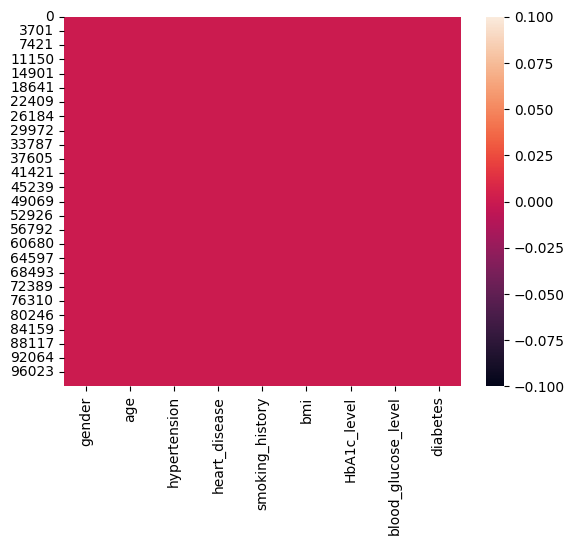

In [345]:
sns.heatmap(data.isnull())

All data is non null however 2 of the rows are object not a number, need to encode them

In [346]:
cols=list(data.columns)
cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [347]:
object_columns=[]
for col in cols:
    if data[col].dtype=='object':
        print(f"Unique values in {col}: {data[col].unique()}")
        object_columns.append(col)
print("Object columns:", object_columns)

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Object columns: ['gender', 'smoking_history']


In [348]:
#Checking the value count of 'gender' and if 'other' is less then droping those rows
print(f'Before Droping\n{data['gender'].value_counts()}')

#it's only 18 so we'll remove the 'other' rows
data=data[data['gender']!='Other']
print(f'\n\nAfter Droping\n{data['gender'].value_counts()}')

Before Droping
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


After Droping
gender
Female    56161
Male      39967
Name: count, dtype: int64


### **Performing EDA Here**

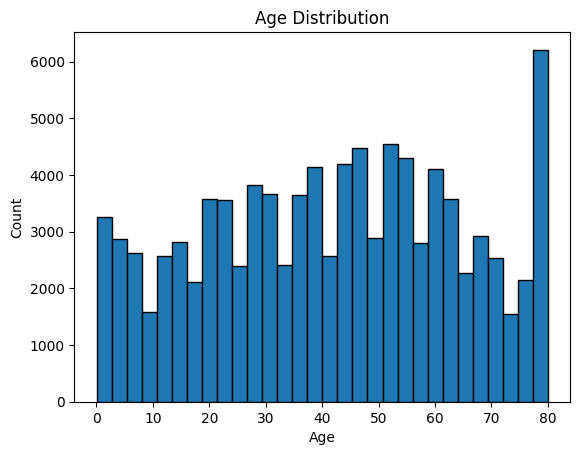

In [349]:
# Histogram for age
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [350]:
#replacing not current to former as both are the same thing
smoking_replace_dict={'not current':'former',
                      'ever':'former',
                      'No Info': 'never'}
data.replace(smoking_replace_dict, inplace=True)
print(data.shape)
data['smoking_history'].value_counts()

(96128, 9)


smoking_history
never      67276
former     19655
current     9197
Name: count, dtype: int64

### Encoding

In [351]:
# performing binary encoding here because i's either male or female here now after dropping 
# 'Other' from the dataset
data['gender_encoded'] = (data['gender'] == 'Male').astype(int)

#droping the original 'gender' column as it's no longer needed
data = data.drop('gender', axis=1)
display(data.sample(5))  

'''Male: 1
   Female: 0'''

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded
75941,11.0,0,0,never,21.52,5.7,80,0,0
35972,56.0,0,0,never,30.10,6.5,130,0,1
90953,32.0,0,0,never,34.29,6.5,158,0,0
56809,55.0,0,0,never,28.73,4.8,159,0,0
73522,80.0,0,0,former,22.32,6.0,80,0,1


'Male: 1\n   Female: 0'

In [352]:
smoking_history_col=list(data['smoking_history'].unique())
smoking_history_col

['never', 'current', 'former']

In [353]:
# Create the one-hot encoded columns
data=pd.get_dummies(data, columns=['smoking_history'], prefix='smoking', dtype=int)

# Display the first few rows with the new columns
display(data.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_current,smoking_former,smoking_never
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,0,0,0,1
2,28.0,0,0,27.32,5.7,158,0,1,0,0,1
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,1,1,0,0


checking the Unique Values in diabetes column

In [354]:
data['diabetes'].unique()

array([0, 1])